In [1]:
import pandas as pd

# Load the CSV into a DataFrame
df = pd.read_csv('../Data_Processed/data_processed.csv')

df = df.drop(columns=['start_time_timestamp', 'end_time_timestamp'])

original_labels = df['label'].copy()

encoded_numbers, unique_categories = pd.factorize(original_labels)

labels = pd.DataFrame({
    'original_label': original_labels,
    'encoded_number': encoded_numbers
})

In [2]:
labels['original_label'].unique()

array(['User', 'Anomaly1', 'Anomaly2', 'Anomaly3', 'Anomaly4'],
      dtype=object)

In [3]:
#Convert bool to int
df['error'] = df['error'].astype(int)
df['is_burst'] = df['is_burst'].astype(int)

# One-hot encode the categorical columns
df_encoded = pd.get_dummies(df, columns=['key', 'combination'], dtype=int)

In [4]:
df_encoded

,start_time,key_per_second,error,seek_time,error_rate,accuracy,end_time,hold_time,label,time_diff,...,"combination_KEY.SPACE,'R'","combination_KEY.SPACE,'S'","combination_KEY.SPACE,'T'","combination_KEY.SPACE,'W'","combination_KEY.SPACE,'Y'","combination_b""Pd\xda\x17\xd6\xaf\xd8\xc7D\xa5@'\x8f\xd2\xa5\x04\x05\\m\x13\xe3W\xa1\x94\xd7t\xa0\xa5\xb4\xe8\x91\x002\x97~+\xe4?(\xfa\xab.\xe2""","combination_b""\x9d\xdc\xa46\xfd\x9c~\xdf3\x80\x16\x9a\xb5!t=\xa2\x1c\xc5\xeb>^F'\x83\xeb\xeeQ\xbc\x83\xa3\xb6Q\x9fhPB\x84I$\x05""","combination_b""\xbe\xe6\x8bftG\xf9\x1a\xc2\x1eb1fH\xa9\x82\x9e\xc1\x97\xc4+a2\xa5\xf0\xf2\xab\xf0\x83\xa8\x88\x86-^\xbb\xa2\x96Sa\x9f\xa6'k""","combination_b""\xedz\xb1\x9f\x996\x15\x98\x1e\xac\x95K\x07\xbd\x99\xde}\xfdX\xf1'\x98*\x07\xbc\x0b\x98\x05\x1c\xf9\x11*\x8e\xd3r\xb38,~\xc0\xdfE\x16""","combination_b""h\xd9\xad\x88\x9a\xe8\xad\x85)>i\x88H\x9a1RH'h\x0c\xcc<\xca\xb57\xbb\xbc\xeb\x84hle\xd8\xc4>z\xc4\xab1#d\x9c\x16"""
0,0.000000,1000.000000,0,0.000000,0.000000,1.000000,0.129991,0.129991,User,0.000000,...,0,0,0,0,0,0,0,0,0,0
1,0.094081,21.258294,0,0.094081,0.000000,1.000000,0.174486,0.080405,User,0.094081,...,0,0,0,0,0,0,0,0,0,0
2,0.251984,11.905523,0,0.077497,0.000000,1.000000,0.347874,0.095890,User,0.157903,...,0,0,0,0,0,0,0,0,0,0
3,0.347874,11.498426,0,0.000000,0.000000,1.000000,0.443911,0.096037,User,0.095890,...,0,0,0,0,0,0,0,0,0,0
4,0.459523,10.880849,0,0.015612,0.000000,1.000000,0.537897,0.078374,User,0.111649,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13246,8.786724,5.235171,0,0.026694,0.086957,0.913043,8.868474,0.081749,Anomaly2,0.139914,...,0,0,0,0,0,0,0,0,0,0
13247,8.955638,5.248091,1,0.087164,0.104167,0.895833,9.094560,0.138922,Anomaly2,0.168913,...,0,0,0,0,0,0,0,0,0,0
13248,9.416808,5.097269,0,0.322248,0.083333,0.916667,9.519837,0.103029,Anomaly2,0.461170,...,0,0,0,0,0,0,0,0,0,0
13249,9.536344,5.138238,0,0.016507,0.102041,0.897959,9.677486,0.141143,Anomaly2,0.119536,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_encoded.columns

Index(['start_time', 'key_per_second', 'error', 'seek_time', 'error_rate',
       'accuracy', 'end_time', 'hold_time', 'label', 'time_diff',
       ...
       'combination_KEY.SPACE,'R'', 'combination_KEY.SPACE,'S'',
       'combination_KEY.SPACE,'T'', 'combination_KEY.SPACE,'W'',
       'combination_KEY.SPACE,'Y'',
       'combination_b"Pd\xda\x17\xd6\xaf\xd8\xc7D\xa5@'\x8f\xd2\xa5\x04\x05\\m\x13\xe3W\xa1\x94\xd7t\xa0\xa5\xb4\xe8\x91\x002\x97~+\xe4?(\xfa\xab.\xe2"',
       'combination_b"\x9d\xdc\xa46\xfd\x9c~\xdf3\x80\x16\x9a\xb5!t=\xa2\x1c\xc5\xeb>^F'\x83\xeb\xeeQ\xbc\x83\xa3\xb6Q\x9fhPB\x84I$\x05"',
       'combination_b"\xbe\xe6\x8bftG\xf9\x1a\xc2\x1eb1fH\xa9\x82\x9e\xc1\x97\xc4+a2\xa5\xf0\xf2\xab\xf0\x83\xa8\x88\x86-^\xbb\xa2\x96Sa\x9f\xa6'k"',
       'combination_b"\xedz\xb1\x9f\x996\x15\x98\x1e\xac\x95K\x07\xbd\x99\xde}\xfdX\xf1'\x98*\x07\xbc\x0b\x98\x05\x1c\xf9\x11*\x8e\xd3r\xb38,~\xc0\xdfE\x16"',
       'combination_b"h\xd9\xad\x88\x9a\xe8\xad\x85)>i\x88H\x9a1RH'h\x0c\xcc<\xc

In [ ]:
#Deal with corrupted columns (5 to be exact)

def is_corrupted(column_name):
    return '\\x' in column_name or '\\u' in column_name

clean_columns = [
    col for col in df_encoded.columns if not is_corrupted(col)
]

df_encoded = df_encoded[clean_columns].copy()

In [11]:
MAIN_USER_LABEL = "User"
TRAINED_MODEL_DIR = '../Trained_Model'

In [12]:
#Deal with missing data

# Create Series with previous and next non-NaN values
prev_values_end_time = df_encoded['end_time'].ffill()
next_values_end_time = df_encoded['end_time'].bfill()

# Identify missing indices in the'end_time' column
missing_indices_end_time = df_encoded['end_time'].isnull()

# For the missing positions, calculate the sum of previous and next non-missing values
df_encoded.loc[missing_indices_end_time, 'end_time'] = \
    prev_values_end_time[missing_indices_end_time] + next_values_end_time[missing_indices_end_time]


df_encoded['variation_in_typing_speed'] = df_encoded['variation_in_typing_speed'].interpolate(method='linear', limit_direction='both')
df_encoded['hold_time'] = df_encoded['hold_time'].interpolate(method='linear', limit_direction='both')
df_encoded['interval'] = df_encoded['interval'].interpolate(method='linear', limit_direction='both')

In [13]:
assert not df_encoded.isna().any().any(), "DataFrame contains NaN values!"

In [14]:
#Data Separation
main_user_data = df_encoded[df_encoded['label'] == MAIN_USER_LABEL].drop('label', axis=1)
other_users_data = df_encoded[df_encoded['label'] != MAIN_USER_LABEL].drop('label', axis=1)

print(f"Main user ('User') data shape: {main_user_data.shape}")
print(f"Other users' data shape: {other_users_data.shape}")

Main user ('User') data shape: (4337, 609)
Other users' data shape: (8914, 609)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import numpy as np
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt

#Replace labels
df_encoded.loc[df_encoded['label'] != MAIN_USER_LABEL, 'label'] = 'Other'
df_encoded.loc[df_encoded['label'] == MAIN_USER_LABEL, 'label'] = 'User'

df_represent = df_encoded.copy()

#Separate label column
X = df_encoded.drop('label', axis=1)
y = df_encoded['label']

#Fit label encoder
le = LabelEncoder()
y_encoded = le.fit_transform(y)

#Split the data, to Test and Train using stratification
X_train, X_test, y_train, y_test = train_test_split(
        X, y_encoded, test_size=0.2, random_state=42, stratify=y
    )

C:\Users\erikp\AppData\Local\Temp\ipykernel_8468\3220812352.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
C:\Users\erikp\AppData\Local\Temp\ipykernel_8468\3220812352.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
C:\Users\erikp\AppData\Local\Temp\ipykernel_8468\3220812352.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')


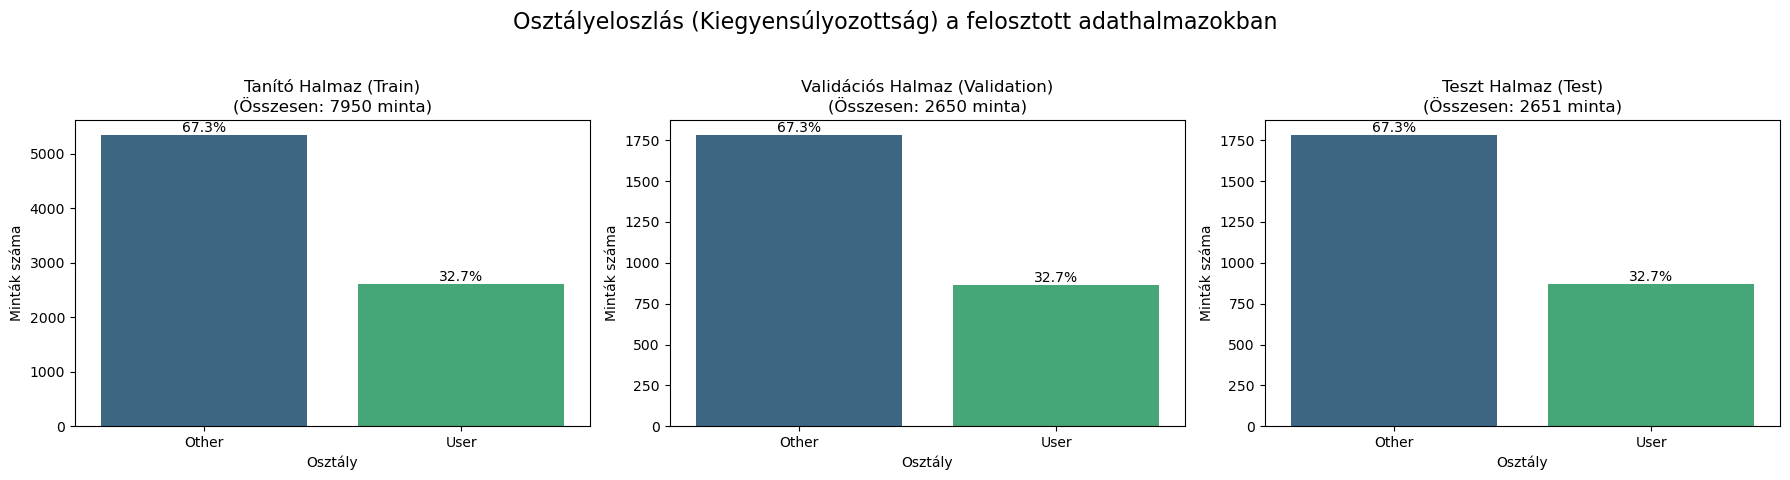

In [16]:
#Create validation dataset
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=42, stratify=y_temp
)

#Prove class balance, and plot each data
def plot_class_balance(y_train, y_val, y_test):
    CLASS_LABELS = ['Other', 'User'] 
    
    data = {
        'Tanító Halmaz (Train)': y_train,
        'Validációs Halmaz (Validation)': y_val,
        'Teszt Halmaz (Test)': y_test
    }
    
    fig, axes = plt.subplots(1, 3, figsize=(18, 5))
    fig.suptitle('Osztályeloszlás (Kiegyensúlyozottság) a felosztott adathalmazokban', fontsize=16)
    
    i = 0
    for name, y_data in data.items():
        y_series = pd.Series(y_data)
        
        counts = y_series.value_counts().sort_index()
        total = len(y_series)
        
        sns.barplot(x=counts.index, y=counts.values, ax=axes[i], palette='viridis')
        axes[i].set_title(f'{name}\n(Összesen: {total} minta)')
        axes[i].set_xlabel('Osztály')
        axes[i].set_ylabel('Minták száma')
        axes[i].set_xticks(counts.index) 
        axes[i].set_xticklabels([CLASS_LABELS[int(idx)] for idx in counts.index])
        
        for p in axes[i].patches:
            percentage = '{:.1f}%'.format(100 * p.get_height() / total)
            x = p.get_x() + p.get_width() / 2
            y = p.get_height()
            axes[i].annotate(percentage, (x, y), ha='center', va='bottom', fontsize=10)

        i += 1
    
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

plot_class_balance(y_train, y_val, y_test)

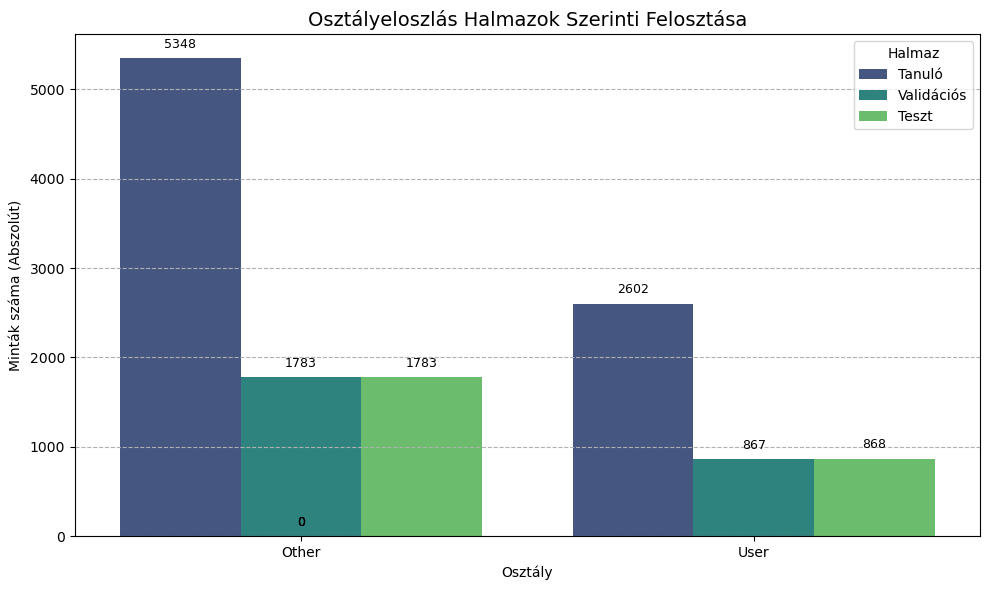

In [17]:
#Plot 1 figure with all the equal datas
def plot_split_balance_stacked_counts(y_train, y_val, y_test):
    CLASS_LABELS = ['Other', 'User'] 
    
    data = {
        'Tanuló': y_train,
        'Validációs': y_val,
        'Teszt': y_test
    }
    
    df_list = []
    for name, y_data in data.items():
        counts = pd.Series(y_data).value_counts().reset_index()
        counts.columns = ['Osztály_kód', 'Mintaszám']
        counts['Halmaz'] = name
        df_list.append(counts)
    
    df_combined = pd.concat(df_list)
    
    max_count = df_combined['Mintaszám'].max()
    offset = max_count * 0.015

    plt.figure(figsize=(10, 6))
    
    df_combined['Osztály'] = df_combined['Osztály_kód'].apply(lambda x: CLASS_LABELS[int(x)])
    
    sns.barplot(
        x='Osztály', 
        y='Mintaszám',
        hue='Halmaz', 
        data=df_combined, 
        palette='viridis'
    )
    
    plt.title('Osztályeloszlás Halmazok Szerinti Felosztása', fontsize=14)
    plt.xlabel('Osztály')
    plt.ylabel('Minták száma (Abszolút)')
    plt.legend(title='Halmaz', loc='upper right')
    plt.grid(axis='y', linestyle='--')
    
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(
            p.get_x() + p.get_width() / 2., 
            height + offset,
            '{:d}'.format(int(height)),
            ha='center', 
            va='bottom',
            fontsize=9
        )
        
    plt.tight_layout()
    plt.show()

plot_split_balance_stacked_counts(y_train, y_val, y_test)

In [19]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

def perform_pca_analysis(df_data, label_column_name, n_components = 10):
    "Perform PCA analysis to check the data columns after all the process"
    
    sns.set_style("whitegrid") 

    df_processed = df_data.copy()

    X = df_processed.drop(label_column_name, axis=1)
    y = df_processed[label_column_name]

    #Standardize the data
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    #PCA fit
    pca = PCA(n_components=n_components)
    pca.fit(X_scaled)
    components = pca.transform(X_scaled)
    
    #Plot
    df_pca_plot = pd.DataFrame({
        'PC1': components[:, 0],
        'PC2': components[:, 1],
        'Label': y
    })
    
    variance_explained = pca.explained_variance_ratio_ * 100
    
    pc1_var = variance_explained[0]
    pc2_var = variance_explained[1]

    plt.figure(figsize=(10, 7))
    
    sns.scatterplot(
        x='PC1', 
        y='PC2', 
        hue='Label', 
        data=df_pca_plot, 
        s=50,
        alpha=0.7
    )
    
    plt.xlabel(f"Főkomponens 1 ({pc1_var:.2f}% Variancia)")
    plt.ylabel(f"Főkomponens 2 ({pc2_var:.2f}% Variancia)")
    plt.title("2 komponensű PCA vizualizáció és klaszterezés (feldolgozott/augmentált adat)")
    plt.legend(title='Felhasználó')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

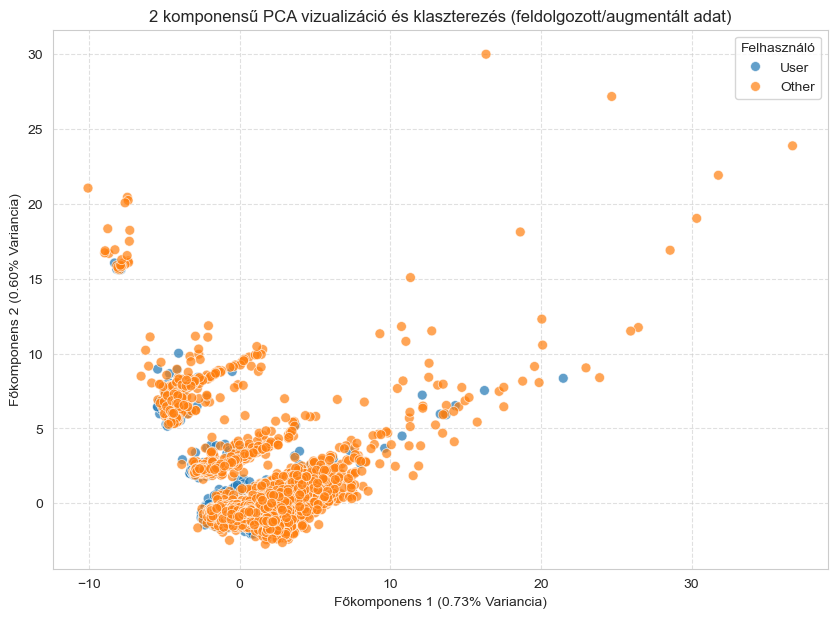

In [20]:
perform_pca_analysis(df_represent, 'label', 2)

In [21]:
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

num_classes = len(np.unique(y_train))
print(f"Number of unique users (classes): {num_classes}")

Training data shape: (7950, 609)
Testing data shape: (2651, 609)
Number of unique users (classes): 2


In [22]:
params = {
        'objective': 'binary:logistic',
        'eval_metric': 'mlogloss',
        'eta': 0.1,  # Learning rate
        'max_depth': 5,
        'subsample': 0.7,
        'colsample_bytree': 0.7,
        'seed': 42,
        'device': 'cuda',
        'reg_alpha': 0.1,
        'reg_lambda': 0.1
    }

In [23]:
model = xgb.XGBClassifier(n_estimators=100, **params)

In [25]:
import time

start_time = time.time()

model.fit(X_train, y_train)

end_time = time.time()
train_time_seconds = end_time - start_time

print(train_time_seconds)

0.8786602020263672


In [26]:
import os

model.save_model("tempToCalculateSize")

# Fájlméret lekérése byte-ban
file_size_bytes = os.path.getsize("tempToCalculateSize")
model_size_mb = file_size_bytes / (1024 * 1024) # Konvertálás MB-ra

print(model_size_mb)

os.remove("tempToCalculateSize")

0.18461036682128906


d:\Workspace\Utils\.conda\envs\diploma\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [23:54:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)


In [27]:
y_pred = model.predict(X_test)

d:\Workspace\Utils\.conda\envs\diploma\Lib\site-packages\xgboost\core.py:729: UserWarning: [23:54:04] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\common\error_msg.cc:58: Falling back to prediction using DMatrix due to mismatched devices. This might lead to higher memory usage and slower performance. XGBoost is running on: cuda:0, while the input data is on: cpu.
Potential solutions:
- Use a data structure that matches the device ordinal in the booster.
- Set the device for booster before call to inplace_predict.

This warning will only be shown once.

  return func(**kwargs)



Model Evaluation
Accuracy: 0.9962

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1783
           1       0.99      1.00      0.99       868

    accuracy                           1.00      2651
   macro avg       1.00      1.00      1.00      2651
weighted avg       1.00      1.00      1.00      2651



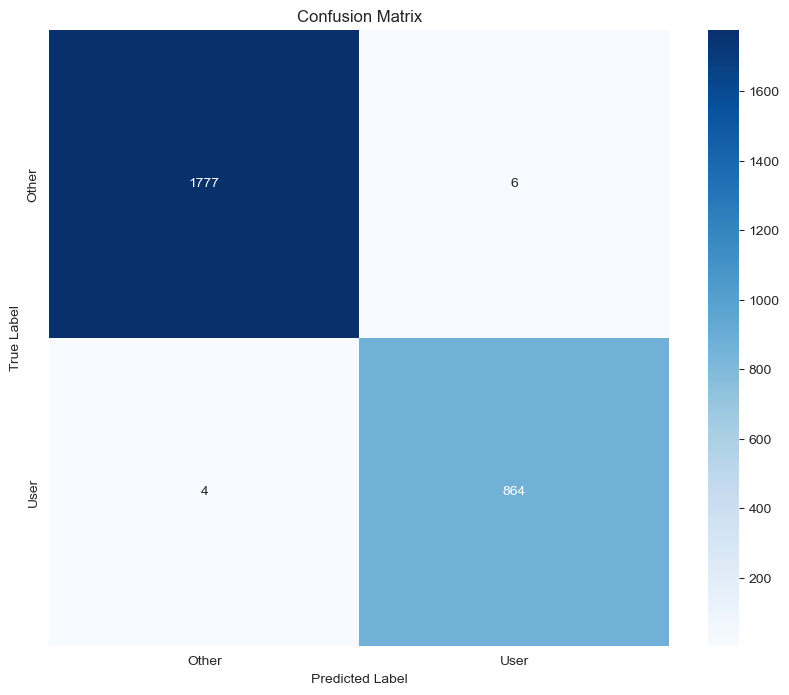

In [29]:
print("\nModel Evaluation")

# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Pontosság: 0.9962
Equal Error Rate (EER): 0.0039

Classification Report (Bináris címkékre vonatkozóan):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1783
           1       0.99      1.00      0.99       868

    accuracy                           1.00      2651
   macro avg       1.00      1.00      1.00      2651
weighted avg       1.00      1.00      1.00      2651



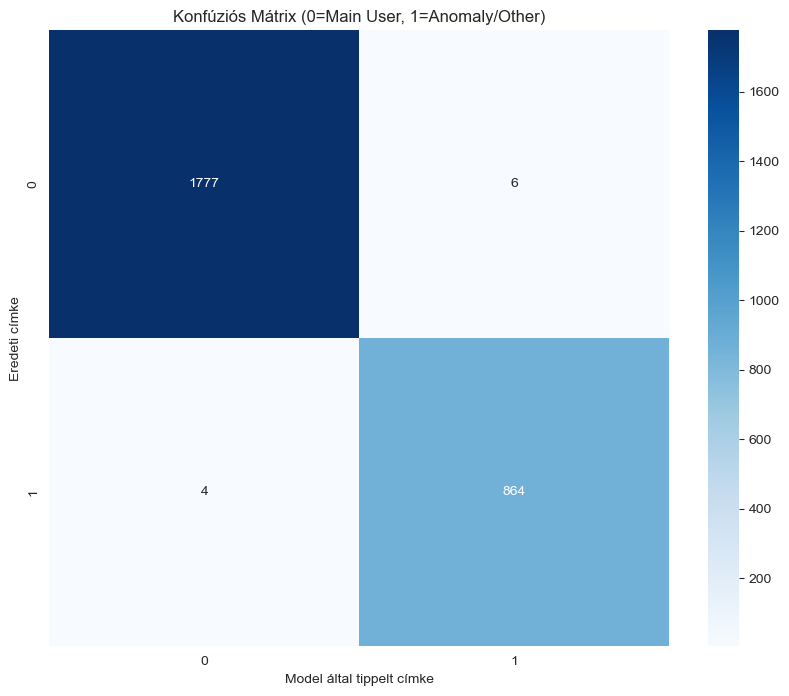

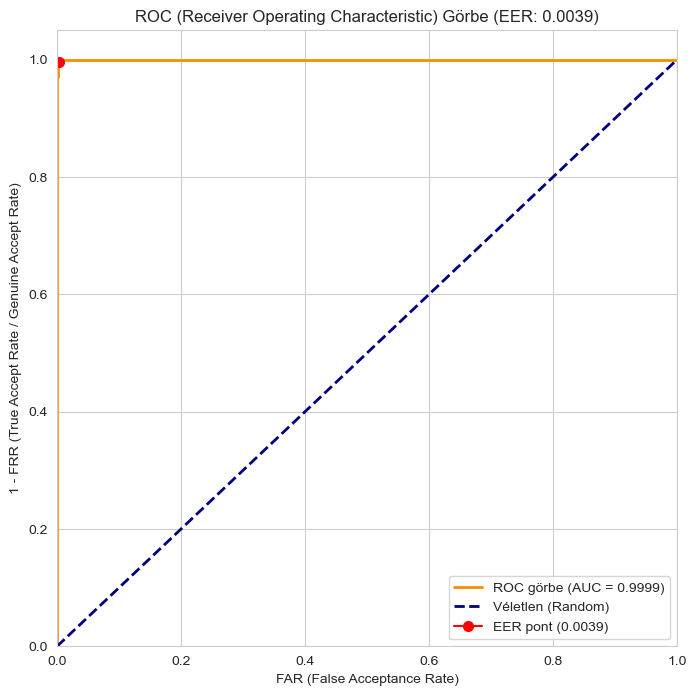


Area Under the Curve (AUC): 0.9999


In [30]:
from sklearn.metrics import roc_curve, auc


#Create ROC and Predict proba
y_proba_raw = model.predict_proba(X_test)
y_proba = y_proba_raw[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

eer_index = np.argmin(np.abs(fpr + tpr - 1)) # vagy np.abs(fpr - (1 - tpr))

eer_far = fpr[eer_index]
eer_frr = 1 - tpr[eer_index] 
eer_threshold = thresholds[eer_index]

accuracy = accuracy_score(y_test, y_pred)
print(f"Pontosság: {accuracy:.4f}")
if not np.isnan(eer_far):
    print(f"Equal Error Rate (EER): {eer_far:.4f}")
    
print("\nClassification Report (Bináris címkékre vonatkozóan):")
print(classification_report(y_test, y_pred, zero_division=0))


#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

labels = np.unique(y_test)
    
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.title('Konfúziós Mátrix (0=Main User, 1=Anomaly/Other)')
plt.xlabel('Model által tippelt címke')
plt.ylabel('Eredeti címke')
plt.show()


#ROC Plot 
plt.figure(figsize=(8, 8))

plt.plot(fpr, tpr, color='darkorange', lw=2, 
            label=f'ROC görbe (AUC = {roc_auc:.4f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Véletlen (Random)') 
plt.plot(eer_far, 1 - eer_frr, marker='o', markersize=7, color='red', 
            label=f'EER pont ({eer_far:.4f})')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])

plt.xlabel('FAR (False Acceptance Rate)')
plt.ylabel('1 - FRR (True Accept Rate / Genuine Accept Rate)')

plt.title(f'ROC (Receiver Operating Characteristic) Görbe (EER: {eer_far:.4f})')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

print(f"\nArea Under the Curve (AUC): {roc_auc:.4f}")


In [31]:
import joblib

#Save the model, OHE features and LE
MODEL_PATH = TRAINED_MODEL_DIR + "/XgBoost/xgboost_model.json"
LABEL_ENCODER_PATH = TRAINED_MODEL_DIR + "/XgBoost/xgboost_label_encoder.joblib"
OHE_COLS_PATH = TRAINED_MODEL_DIR + "/XgBoost/xgboost_ohe_cols.npy"


model.save_model(MODEL_PATH)
joblib.dump(le, LABEL_ENCODER_PATH)
np.save(OHE_COLS_PATH, X.columns.values)